# Jargon Distance --- Demonstration

This notebook demonstrates how to use the `jargon-distance` library to calculate and visualize the jargon distances between the texts of some (public domain) literature. Taking two works each from William Shakespeare, Mark Twain, and Charles Dickens, it finds the distribution of words in each, then finds the pairwise jargon distance between each one.

In [28]:
import codecs
from nltk import word_tokenize, ngrams
from collections import Counter

In [29]:
filenames_and_titles = [
    ('./text_data/shakespeare/1786.txt.utf-8', 'William Shakespeare - As You Like It'), 
    ('./text_data/shakespeare/1793.txt.utf-8', 'William Shakespeare - Othello'),
    ('./text_data/sawyer/74-0.txt', 'Mark Twain - The Adventures of Tom Sawyer'),
    ('./text_data/sawyer/76-0.txt', 'Mark Twain - The Adventures of Huckleberry Finn'),
    ('./text_data/dickens/pg19337.txt', 'Charles Dickens - A Christmas Carol'),
    ('./text_data/dickens/pg730.txt', 'Charles Dickens - Oliver Twist')
]

In [30]:
# If you have not used the nltk (Natural Language Toolkit) library previously, 
# you will need to uncomment and run the following to download data:

# nltk.download('punkt')

The input to the jargon distance calculator is a dictionary of document -> term counter:

In [31]:
term_count_dict = {}  # mapping of title -> term_counter
for fname, title in filenames_and_titles:
    with codecs.open(fname, 'r', encoding='utf8') as f:
        txt = f.read()
    txt = txt.lower()
    tokens = word_tokenize(txt)
    ng = ngrams(tokens, 1)
    term_counts = Counter(ng)
    term_count_dict[title] = term_counts

In [32]:
from jargon_distance import JargonDistance

In [33]:
# Create JargonDistance object and calculate jargon distance
j = JargonDistance(term_count_dict)
j.calculate_jargon_distance()

### Visualize results

In [34]:
from jargon_distance.analysis import JargonDistanceAnalysis

In [35]:
ja = JargonDistanceAnalysis.from_object(j)

# We will used the symmetrized version of the jargon distance, 
# so that the distance from document 1 to document 2 is the same as 
# the distance from document 2 to document 1.
ja.symmetrize_graph()

The distances are now in a networkx Graph, with documents as nodes and weighted edges denoting jargon distances.

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

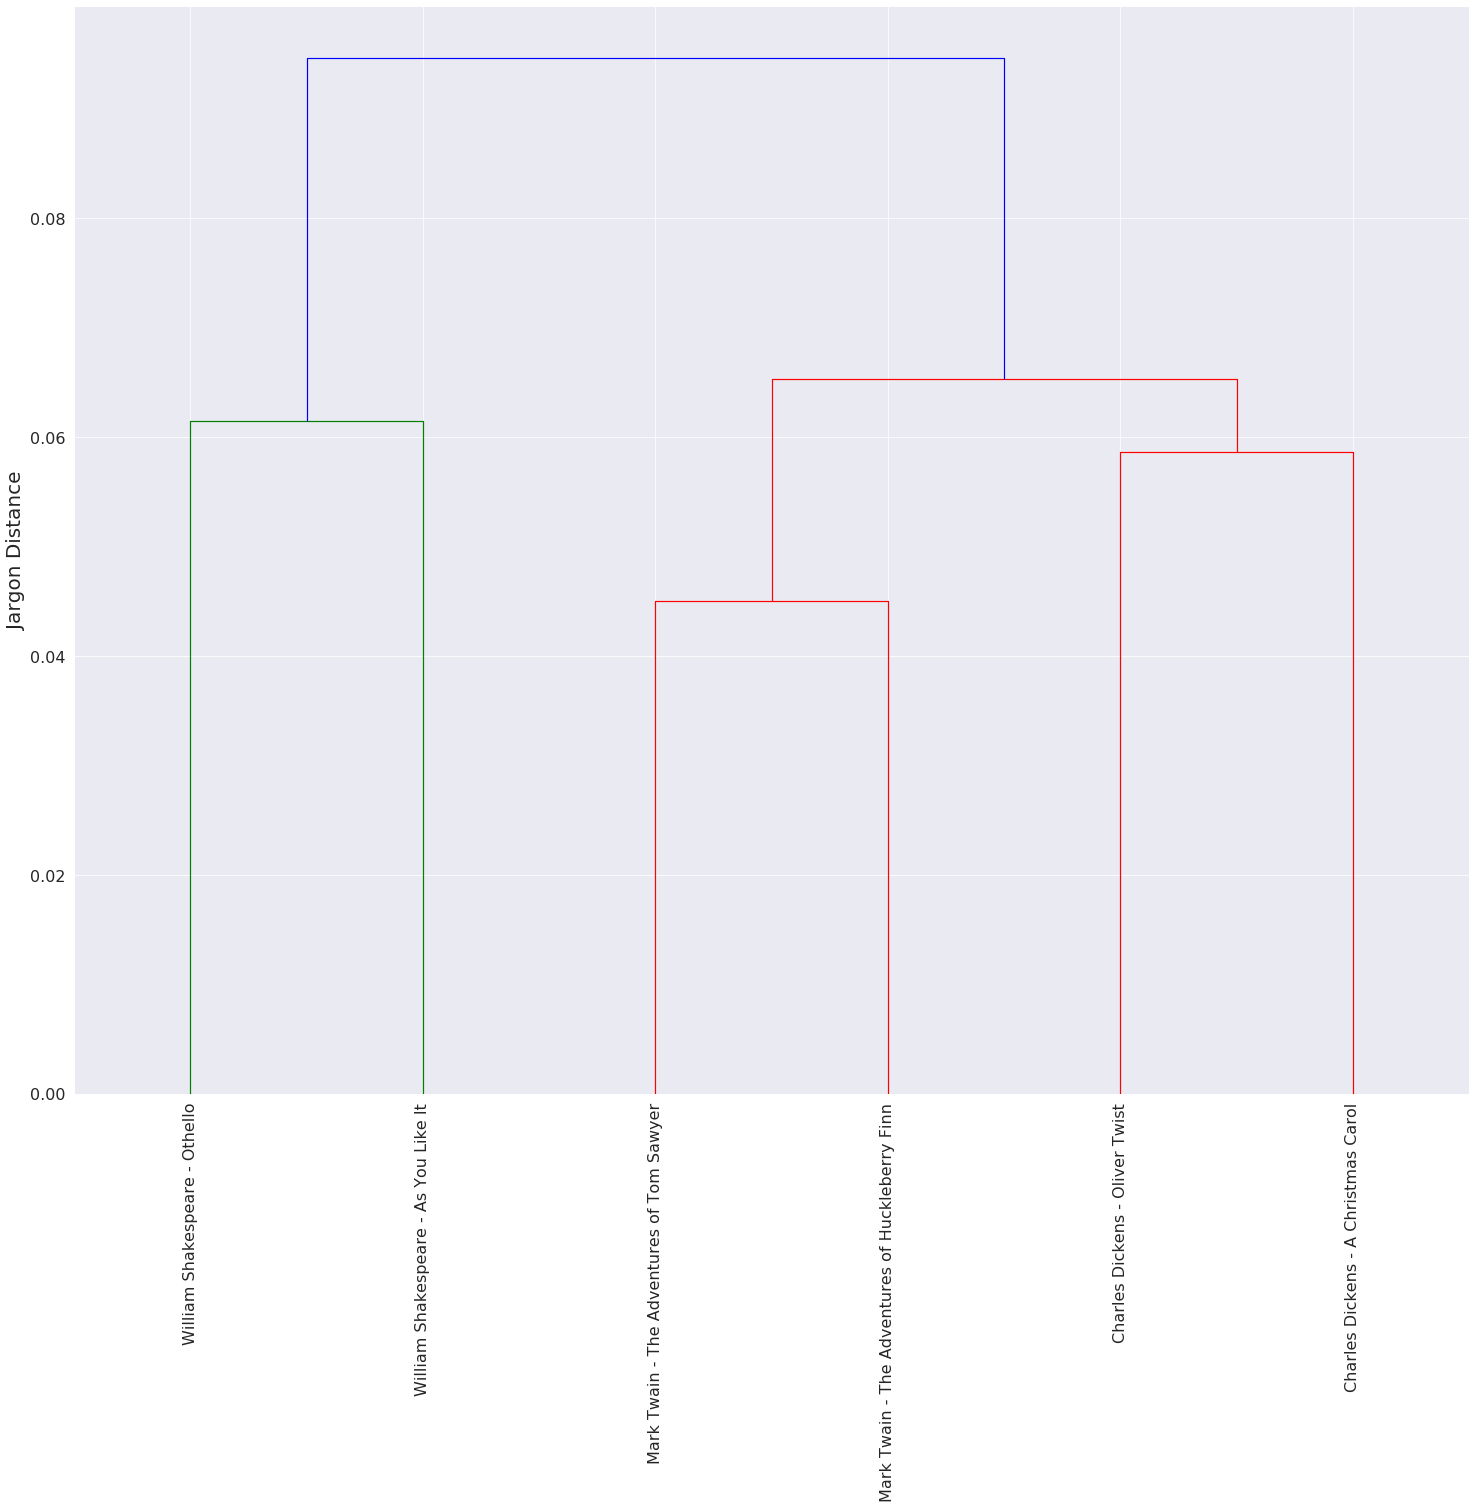

In [41]:
labels = list(ja.G_sym)
ja.make_dendrogram(labels=labels, show_plot=True, rotation=90.)

The dendrogram above shows that each work is closest to the other work by the same author (e.g., Charles Dickens's novels are more like each other than they are to any of the other works). Dickens and Twain, being contemporaries of each other, are closer to each other than they are to Shakespeare, who lived three centuries earlier.

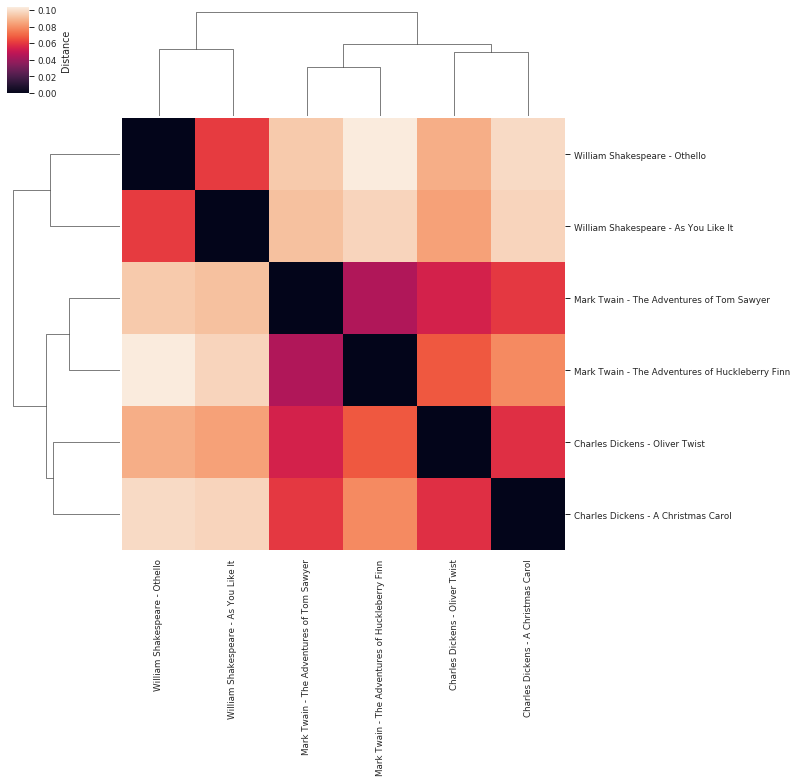

In [42]:
cm = ja.make_sns_clustermap(labels=labels)

We can also supply a `group_map` to assign each document to a group. For example, we can assign each work to its author:

In [43]:
group_map = {}
for title in term_count_dict.keys():
    author = title.split(' - ')[0]
    group_map[title] = author

In [44]:
group_map

{'William Shakespeare - As You Like It': 'William Shakespeare',
 'William Shakespeare - Othello': 'William Shakespeare',
 'Mark Twain - The Adventures of Tom Sawyer': 'Mark Twain',
 'Mark Twain - The Adventures of Huckleberry Finn': 'Mark Twain',
 'Charles Dickens - A Christmas Carol': 'Charles Dickens',
 'Charles Dickens - Oliver Twist': 'Charles Dickens'}

In [45]:
j2 = JargonDistance(term_count_dict, group_map)
j2.calculate_jargon_distance()

In [47]:
ja2 = JargonDistanceAnalysis.from_object(j2)

ja2.symmetrize_graph()

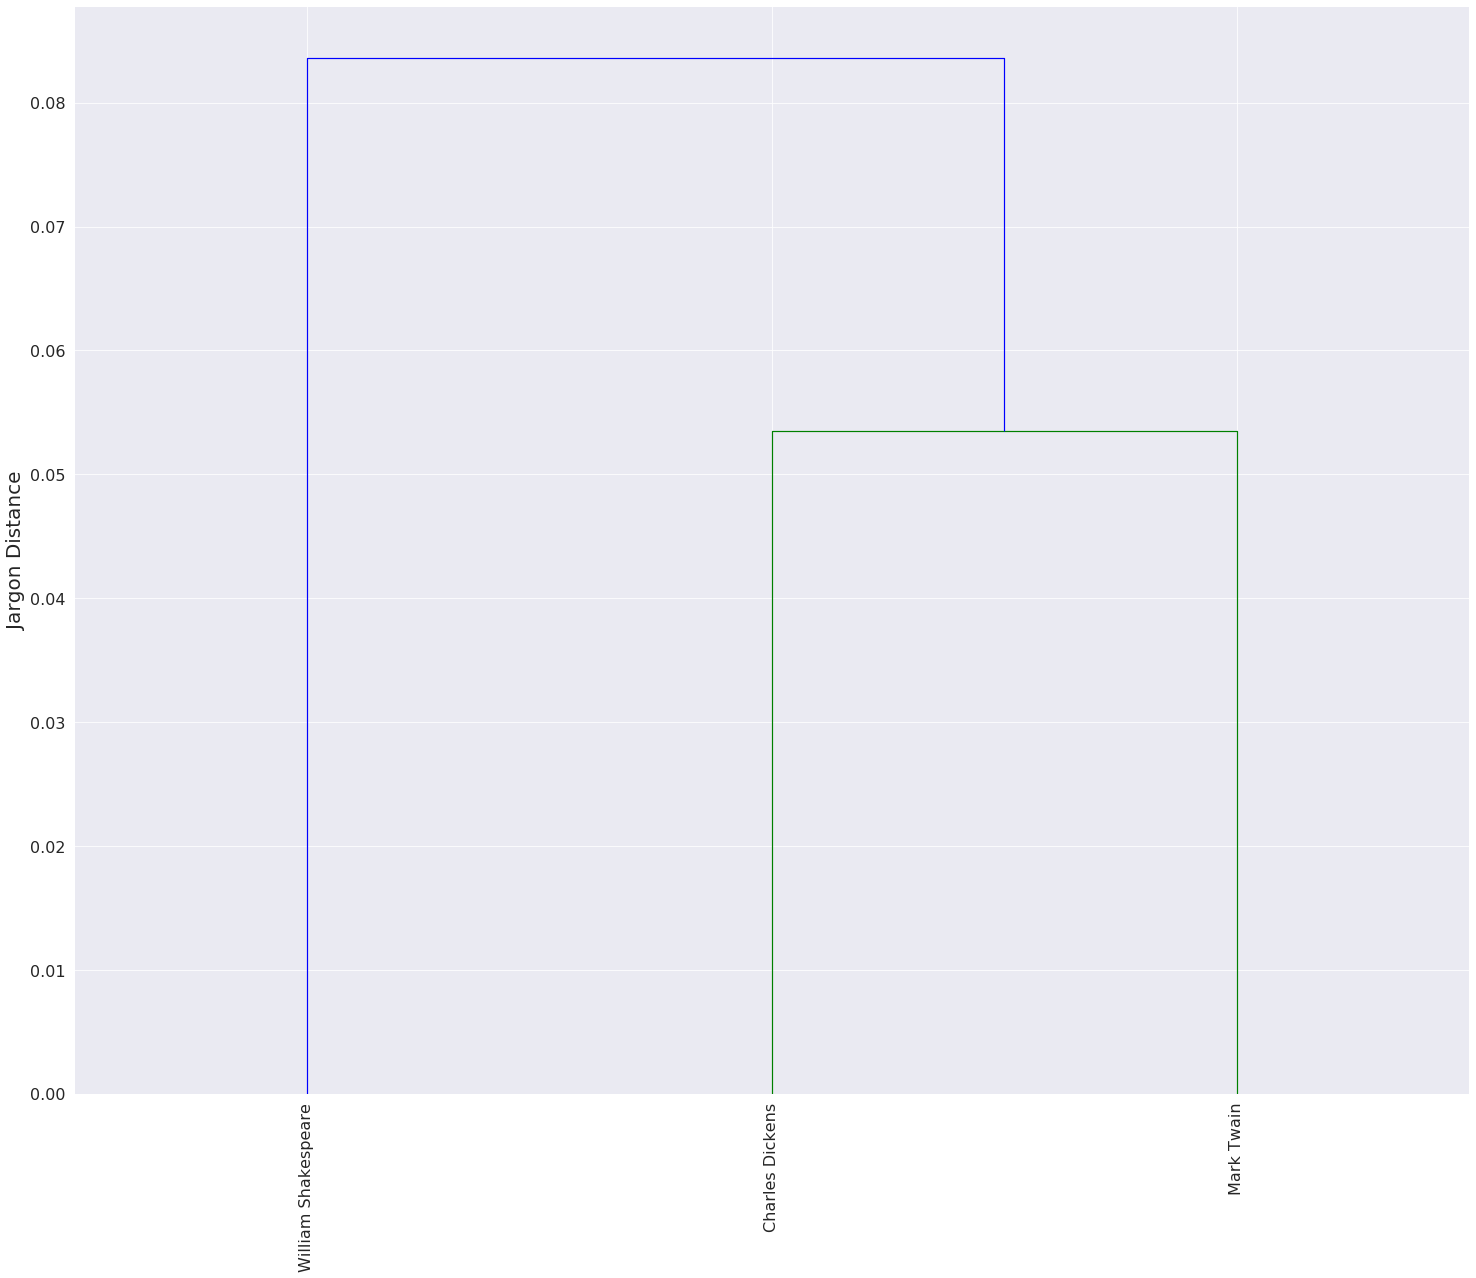

In [49]:
labels2 = list(ja2.G_sym.nodes())
ja2.make_dendrogram(labels=labels2, show_plot=True, rotation=90.)